In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
train_set = torchvision.datasets.MNIST(root = 'image_data/', train = True, download = True, transform = transforms.ToTensor())

/Users/roshnaey/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
len(train_set)

60000

In [4]:
test_set = torchvision.datasets.MNIST(root = 'image_data/', train = False, download = True, transform = transforms.ToTensor())

In [5]:
len(test_set)

10000

In [6]:
img, lbl = train_set[0]
img.shape

torch.Size([1, 28, 28])

In [7]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

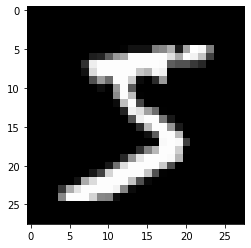

In [8]:
plt.imshow(img.view(28, 28), cmap = 'gray')

In [9]:
lbl

5

#### Batch Size

In [10]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 250, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 250)

In [11]:
tmp_data = iter(train_loader)
img_batch, lbl_batch = tmp_data.next()
img_batch.shape, lbl_batch.shape

(torch.Size([250, 1, 28, 28]), torch.Size([250]))

In [12]:
len(tmp_data)

240

#### Number of hidden layers

In [13]:
class FFNN(nn.Module):
    def __init__(self, _input_dim, _hidden_dim, _output_dim):
        super(FFNN, self).__init__()
        
        #self.layer_one = nn.Linear(_input_dim, _hidden_dim)
        #self.layer_two = nn.Linear(_hidden_dim, _output_dim)
        
        self.input_layer = nn.Linear(_input_dim, _hidden_dim[0])
        self.hid_layer_one = nn.Linear(_hidden_dim[0], _hidden_dim[1])
        self.hid_layer_two = nn.Linear(_hidden_dim[1], _hidden_dim[2])
        self.hid_layer_three = nn.Linear(_hidden_dim[2], _hidden_dim[3])
        self.hid_layer_four = nn.Linear(_hidden_dim[3], _hidden_dim[4])
        self.output_layer = nn.Linear(_hidden_dim[4], _output_dim)



        
    def forward(self, _x):
        #result = self.layer_one(_x)
        #result = F.relu(result)
        #result = self.layer_two(result)
        
        result = self.input_layer(_x)
        result = F.relu(result)
        
        result = self.hid_layer_one(result)
        result = F.relu(result)

        result = self.hid_layer_two(result)
        result = F.relu(result)

        result = self.hid_layer_three(result)
        result = F.relu(result)

        result = self.hid_layer_four(result)
        result = F.relu(result)


        result = self.output_layer(result)
        result = F.relu(result)        
        
        return result

#### Neurons in hidden layers and epochs

In [14]:
INP_DIM = img.shape[1] * img.shape[2]
HID_DIM = [30, 45, 70, 20, 10]
OUT_DIM = 10
EPOCHS = 15

In [15]:
ffnn_model = FFNN(INP_DIM, HID_DIM, OUT_DIM)
print(ffnn_model)

FFNN(
  (input_layer): Linear(in_features=784, out_features=30, bias=True)
  (hid_layer_one): Linear(in_features=30, out_features=45, bias=True)
  (hid_layer_two): Linear(in_features=45, out_features=70, bias=True)
  (hid_layer_three): Linear(in_features=70, out_features=20, bias=True)
  (hid_layer_four): Linear(in_features=20, out_features=10, bias=True)
  (output_layer): Linear(in_features=10, out_features=10, bias=True)
)


#### Learning rate

In [16]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ffnn_model.parameters(), lr=0.003)

In [17]:
for epoch in range(EPOCHS):
    print('Epoch: {}/{}'.format(epoch + 1, EPOCHS))
    batch_loss = []
    for idx, (image_batch, label_batch) in enumerate(train_loader):
        image_batch = image_batch.reshape(-1, INP_DIM)
        pred_labels = ffnn_model(image_batch)
        loss = loss_function(pred_labels, label_batch)
        batch_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print('average loss: {:.6f}'.format(sum(batch_loss)/len(batch_loss)))

Epoch: 1/15
average loss: 0.926250
Epoch: 2/15
average loss: 0.290334
Epoch: 3/15
average loss: 0.204950
Epoch: 4/15
average loss: 0.166555
Epoch: 5/15
average loss: 0.143898
Epoch: 6/15
average loss: 0.126743
Epoch: 7/15
average loss: 0.114313
Epoch: 8/15
average loss: 0.103218
Epoch: 9/15
average loss: 0.097250
Epoch: 10/15
average loss: 0.094106
Epoch: 11/15
average loss: 0.084983
Epoch: 12/15
average loss: 0.078870
Epoch: 13/15
average loss: 0.077949
Epoch: 14/15
average loss: 0.070433
Epoch: 15/15
average loss: 0.067978


#### Accuracy

In [18]:
with torch.no_grad():
    num_correct = 0
    num_images = 0
    for tst_img_batch, tst_lbl_batch in test_loader:
        tst_img_batch = tst_img_batch.reshape(-1, INP_DIM)
        result = ffnn_model(tst_img_batch)
        _, predictions = torch.max(result, dim= 1)
        num_images += tst_lbl_batch.shape[0]
        num_correct += torch.sum(predictions == tst_lbl_batch).item()
    accuracy = (num_correct/num_images) * 100.
    
print('accuracy: {} percent'.format(accuracy))

accuracy: 96.33 percent
